In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the dataset
data = pd.read_csv('D:/course/semester-7-courses/DS 440/cleanedstroke.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3422,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3423,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3424,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [4]:
# Find the number of data have stroke or not
StrokeNum = data.groupby(['stroke'])['stroke'].count()
print(StrokeNum)

stroke
0    3246
1     180
Name: stroke, dtype: int64


In [5]:
print(data['smoking_status'].unique())
print(data['work_type'].unique())
print(data['ever_married'].unique())
print(data['Residence_type'].unique())
print(data['gender'].unique())

['formerly smoked' 'never smoked' 'smokes']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Yes' 'No']
['Urban' 'Rural']
['Male' 'Female' 'Other']


In [3]:
one_hot_encoded_data = pd.get_dummies(data, columns=['smoking_status', 'work_type'])
one_hot_encoded_data = one_hot_encoded_data * 1
one_hot_encoded_data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67,0,1,Yes,Urban,228.69,36.6,1,1,0,0,0,0,1,0,0
1,31112,Male,80,0,1,Yes,Rural,105.92,32.5,1,0,1,0,0,0,1,0,0
2,60182,Female,49,0,0,Yes,Urban,171.23,34.4,1,0,0,1,0,0,1,0,0
3,1665,Female,79,1,0,Yes,Rural,174.12,24.0,1,0,1,0,0,0,0,1,0
4,56669,Male,81,0,0,Yes,Urban,186.21,29.0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,Male,82,1,0,Yes,Rural,71.97,28.3,0,0,1,0,0,0,0,1,0
3422,45010,Female,57,0,0,Yes,Rural,77.93,21.7,0,0,1,0,0,0,1,0,0
3423,44873,Female,81,0,0,Yes,Urban,125.20,40.0,0,0,1,0,0,0,0,1,0
3424,19723,Female,35,0,0,Yes,Rural,82.99,30.6,0,0,1,0,0,0,0,1,0


In [6]:
data2 = one_hot_encoded_data
data2['gender'] = data2['gender'].replace({'Male': 1, 'Female': 0})
data2['ever_married'] = data2['ever_married'].replace({'Yes': 1, 'No': 0})
data2['Residence_type'] = data2['Residence_type'].replace({'Urban': 1, 'Rural': 0})
data2 = data2[data2['gender'] != 'Other']
data2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67,0,1,1,1,228.69,36.6,1,1,0,0,0,0,1,0,0
1,31112,1,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0
2,60182,0,49,0,0,1,1,171.23,34.4,1,0,0,1,0,0,1,0,0
3,1665,0,79,1,0,1,0,174.12,24.0,1,0,1,0,0,0,0,1,0
4,56669,1,81,0,0,1,1,186.21,29.0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,1,82,1,0,1,0,71.97,28.3,0,0,1,0,0,0,0,1,0
3422,45010,0,57,0,0,1,0,77.93,21.7,0,0,1,0,0,0,1,0,0
3423,44873,0,81,0,0,1,1,125.20,40.0,0,0,1,0,0,0,0,1,0
3424,19723,0,35,0,0,1,0,82.99,30.6,0,0,1,0,0,0,0,1,0


In [7]:
X = data2.drop(columns='stroke', axis=1)
y = data2['stroke']

In [8]:
X

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67,0,1,1,1,228.69,36.6,1,0,0,0,0,1,0,0
1,31112,1,80,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,0
2,60182,0,49,0,0,1,1,171.23,34.4,0,0,1,0,0,1,0,0
3,1665,0,79,1,0,1,0,174.12,24.0,0,1,0,0,0,0,1,0
4,56669,1,81,0,0,1,1,186.21,29.0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,1,82,1,0,1,0,71.97,28.3,0,1,0,0,0,0,1,0
3422,45010,0,57,0,0,1,0,77.93,21.7,0,1,0,0,0,1,0,0
3423,44873,0,81,0,0,1,1,125.20,40.0,0,1,0,0,0,0,1,0
3424,19723,0,35,0,0,1,0,82.99,30.6,0,1,0,0,0,0,1,0


In [9]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3421    0
3422    0
3423    0
3424    0
3425    0
Name: stroke, Length: 3425, dtype: int64

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 2740
The number of records in the test dataset is 685
The training dataset has 2604 records for the majority class and 136 records for the minority class.


In [11]:
model = keras.Sequential([
    keras.layers.Input(shape=(17,)),  # Input layer, specify input shape
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 20%
    keras.layers.Dense(64, activation='relu'),  # Another fully connected layer
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [16]:
from pandas._libs.hashtable import value_count
print(X_train['gender'].value_counts())
print(X_test['gender'].value_counts())

gender
0    1683
1    1057
Name: count, dtype: int64
gender
0    403
1    282
Name: count, dtype: int64


In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 136
Before OverSampling, counts of label '0': 2604 
After OverSampling, the shape of train_X: (5208, 17)
After OverSampling, the shape of train_y: (5208,) 

After OverSampling, counts of label '1': 2604
After OverSampling, counts of label '0': 2604


In [16]:
model = keras.Sequential([
    keras.layers.Input(shape=(17,)),  # Input layer, specify input shape
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 20%
    keras.layers.Dense(64, activation='relu'),  # Another fully connected layer
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(1, activation='softmax')  # Output layer
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your x_train and y_train data
X_train_res = tf.convert_to_tensor(X_train_res, dtype=tf.float32)
y_train_res = tf.convert_to_tensor(y_train_res, dtype=tf.float32)
model.fit(X_train_res, y_train_res, epochs=10, batch_size=32) 

Epoch 1/10


D:\pycharm\venv\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


163/163 [==============================] - 9s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 8/10
163/163 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 9/10
163/163 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 10/10
163/163 [==============================] - 2s 10ms/step - loss:

In [77]:
print(X_train)

[[8022 1 16 ... 1 0 0]
 [69647 1 30 ... 1 0 0]
 [38678 0 66 ... 0 1 0]
 ...
 [34525 0 27 ... 1 0 0]
 [48073 1 67 ... 0 0 0]
 [54022 0 78 ... 0 1 0]]


In [76]:

# Select relevant features
selected_features = data[['Age', 'Income']]

# Perform one-hot encoding for categorical data
encoded_data = pd.get_dummies(data['Gender'])

# Combine numerical and encoded data
feature_vector = pd.concat([selected_features, encoded_data], axis=1)

# Convert the feature vector to a NumPy array
feature_vector = feature_vector.to_numpy()

NameError: name 'vectorize' is not defined

In [28]:
#Bayesian classifier 
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
X_train = np.array(X_train)
y_pred_nb = clf_nb.predict(X_test)

D:\pycharm\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [20]:
from sklearn.metrics import accuracy_score

# Assuming y_pred_nb contains your model's predictions and y_test contains actual labels
accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9094890510948905


In [62]:
#support vector machine (SVM)
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [63]:
# Assuming y_pred_nb contains your model's predictions and y_test contains actual labels
accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9094890510948905


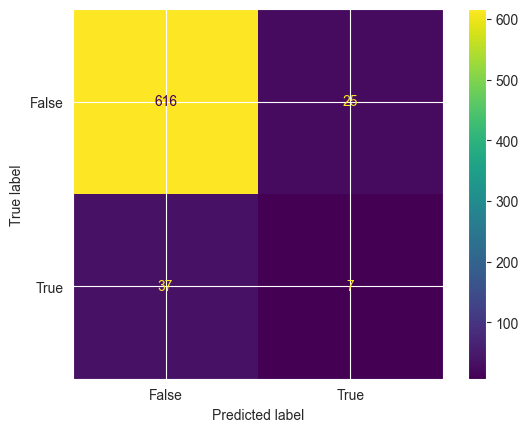

In [27]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = y_pred_nb

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3425, 685]

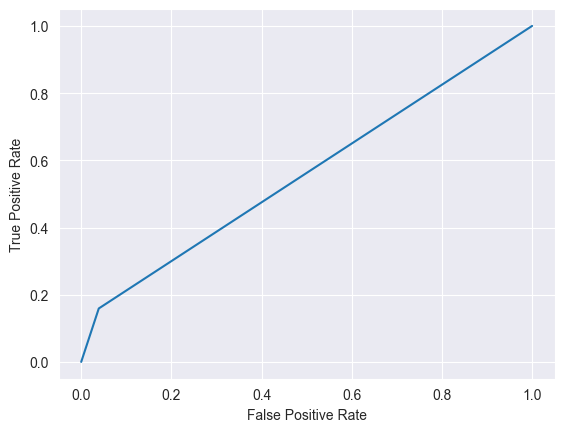

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(y_test, y_pred_nb)
print(f'model 1 AUC score: {roc_auc_score(y, y_pred_nb)}')